In [392]:
# -*- coding: utf-8 -*-

csvfile_path = '/Users/serratus/Downloads/Ни шиша - все вместе.csv'
import pandas
import matplotlib.pyplot as plt
import numpy as np
data = pandas.read_csv(csvfile_path)# засунь содержимое файла в датафрейм 
# поправить даты, чтоб они были в одном формате и чтоб с ними можно было обращаться как с числами

data['date_'] = data['date'].map(lambda s: 2020 if s == "2000+" else s) 
data.set_value(30, 'date_',2001)
data['date_'] = pandas.to_numeric(data['date_'])
data['date_'] = data['date_'].fillna(1840) # примеры с неизвестной датой мы метим 1840-м годом. можно будет отрезать начало списка, когда мы рисуем график

data['semantics+_'] = data['semantics+'].fillna('')

years = sorted(list(data['date_'].unique()))
types = list(data['semantics+_'].unique())

####
print(types, years)

['понимать', 'воспринимать', 'обладать', 'обладать абс', 'стоить', 'делать', 'пр', ''] [1840.0, 1845.0, 1852.0, 1857.0, 1859.0, 1864.0, 1866.0, 1869.0, 1880.0, 1882.0, 1887.0, 1888.0, 1893.0, 1894.0, 1897.0, 1908.0, 1913.0, 1920.0, 1924.0, 1928.0, 1931.0, 1934.0, 1935.0, 1941.0, 1942.0, 1944.0, 1945.0, 1948.0, 1953.0, 1955.0, 1956.0, 1960.0, 1961.0, 1963.0, 1964.0, 1965.0, 1966.0, 1968.0, 1969.0, 1970.0, 1971.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1980.0, 1981.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0]


In [391]:
# # dict-of-dicts approach
# types = data['semantics+_'].unique()
# years = data['date_'].unique()
# d = {}
# for t in data['semantics+_']:
#     for y in years:
#         if t not in d.keys():
#             d[t] = 1
#         else:
#             d[t] += 1
# print(d)
# #years_vs_types

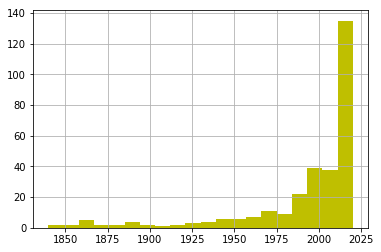

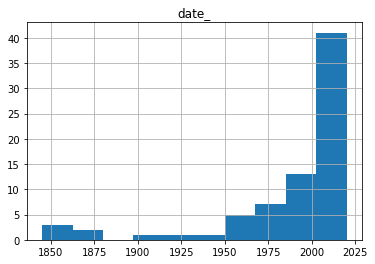

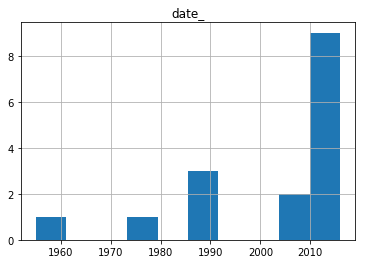

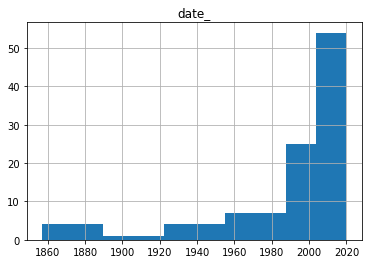

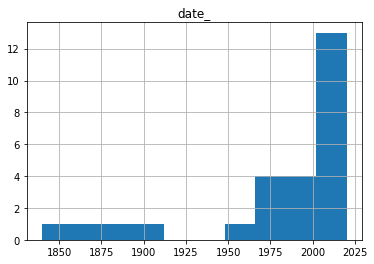

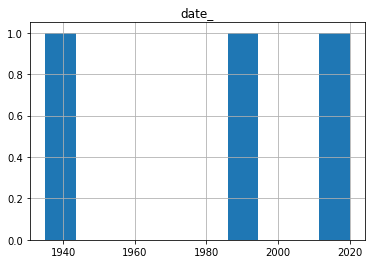

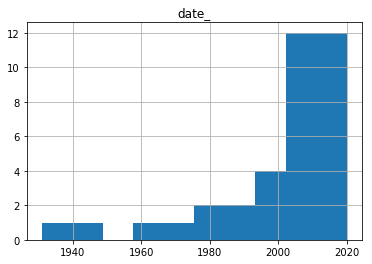

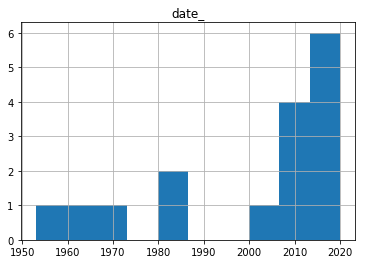

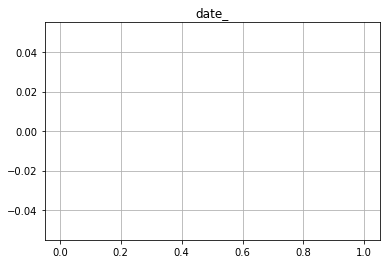

In [405]:
#data[['semantics+_', 'date_']].plot()
data['date_'].hist(bins=20, color='y')
for t in types:
    data[['date_', 'semantics+_']][data['semantics+']==t].hist()
    plt.show()
# data[['semantics+_', 'date_']].hist(by=data['date_']) # нарисуй гистограмму на холсте
# plt.show() # покажи холст
# data.head() # покажи сводку содержимого датафрейма

# for t in types:
#     for y in years:
#         filtered_data = data[(data['semantics+_']==t) & (data['date_uniform']==y)]
#         print(t, y, '#', len(filtered_data.index), filtered_data)

In [343]:
semantic_types = data['semantics+_'].unique()
for t in semantic_types:
    #data[data['semantics+_']==t]
#     print(data[data['semantics+_']==t])
    print("#", '='*80, "#", "here's", t)
    for r in data[data['semantics+_']==t]:
        print(r)
    

# ================================================================================ # here's понимать
left context
left context highlight
n
right context
right context highlight
source
date
predicat position
predicat
extra
semantics
semantics+
tense
person
number
form
date_uniform
semantics+_
# ================================================================================ # here's воспринимать
left context
left context highlight
n
right context
right context highlight
source
date
predicat position
predicat
extra
semantics
semantics+
tense
person
number
form
date_uniform
semantics+_
# ================================================================================ # here's обладать
left context
left context highlight
n
right context
right context highlight
source
date
predicat position
predicat
extra
semantics
semantics+
tense
person
number
form
date_uniform
semantics+_
# ================================================================================ # here's обладать абс
left context

In [344]:
for r in data.itertuples():
    print(r)

Pandas(Index=0, _1='Из всей их беседы не извлек я', _2='извлек', n='ни шиша', _4='.', _5=nan, source='А. В. Дружинин. Дневник', date='1845', _8='l', predicat='извлечь', extra=nan, semantics=nan, _12='понимать', tense='present', person=3.0, number=1.0, form=nan, date_uniform=1845.0, _18='понимать')
Pandas(Index=1, _1='Жаль Сая, а что же будет с новым главнокомандующим, генерал-губернатором Гуандуна, который при 60 с лишком своих который при 60 с лишком своих лет шарлатанит о победах, а в военном деле не смыслит', _2='смыслит', n='ни шиша', _4='.', _5=nan, source='К. А. Скачков. Мой дневник', date='1852', _8='l', predicat='смыслить', extra=nan, semantics=nan, _12='понимать', tense='present', person=3.0, number=1.0, form=nan, date_uniform=1852.0, _18='понимать')
Pandas(Index=2, _1='Впрочем, я', _2=nan, n='ни шиша', _4='не смыслю в моей болезни и не знаю наверно, что у меня болит. ', _5='смыслю', source='Ф. М. Достоевский. Записки из подполья', date='1864', _8='r', predicat='смыслить', ext

In [345]:
# making a dict of dicts
years = data['date_uniform'].unique()
years_dict = dict((lambda l: [(x, 0) for x in l])(data['date_uniform'].unique()))
types_x_years_dict = dict((lambda l: [(x, years_dict.copy()) for x in l])(data['semantics+_'].unique()))


In [346]:
# an ndarray
years = data['date_uniform'].unique()
years_x_types_ndarray = np.zeros(shape=(len(years),len(types)))
years_x_types_ndarray.shape
years_x_types_ndarray[0,0] 
years_ndarray = np.zeros(shape=(len(years)))

In [347]:
#data.fillna('NaN') # turn numpy.nan into a string wherever it occurs
#pandas.DataFrame() #how do I make a new dataframe with columns from types and rows from years?
for t in data['semantics+_'].unique():
    for r in data[data['semantics+_']==t].itertuples(): # data['semantics+_']==t делает маску, внешняя data[...] этой маской выбирает нужные строки, а itertuples() позволяет брать строки по одной, итерируясь по датафрейму как по списку collections.namedtuple, а просто так по датафрейму итерироваться нельзя 
        print(r)
        y = r.date_uniform 
        types_x_years_dict[t][y] += 1
        years_dict[y] += 1

Pandas(Index=0, _1='Из всей их беседы не извлек я', _2='извлек', n='ни шиша', _4='.', _5=nan, source='А. В. Дружинин. Дневник', date='1845', _8='l', predicat='извлечь', extra=nan, semantics=nan, _12='понимать', tense='present', person=3.0, number=1.0, form=nan, date_uniform=1845.0, _18='понимать')
Pandas(Index=1, _1='Жаль Сая, а что же будет с новым главнокомандующим, генерал-губернатором Гуандуна, который при 60 с лишком своих который при 60 с лишком своих лет шарлатанит о победах, а в военном деле не смыслит', _2='смыслит', n='ни шиша', _4='.', _5=nan, source='К. А. Скачков. Мой дневник', date='1852', _8='l', predicat='смыслить', extra=nan, semantics=nan, _12='понимать', tense='present', person=3.0, number=1.0, form=nan, date_uniform=1852.0, _18='понимать')
Pandas(Index=2, _1='Впрочем, я', _2=nan, n='ни шиша', _4='не смыслю в моей болезни и не знаю наверно, что у меня болит. ', _5='смыслю', source='Ф. М. Достоевский. Записки из подполья', date='1864', _8='r', predicat='смыслить', ext

In [348]:
# Галка, [27 Apr 2017, 0:41]:
# 1. отрисовать частотность по годам от всей выборки за опр. период, например 15 лет или просто частотность на худой конец
#   1. Собираем даты по типам:
#     Для каждого семантического типа:
years = data['date_uniform'].unique()
year_nums=dict(zip(years,range(len(years))))
types = data['semantics+_'].unique()
type_nums=dict(zip(types,range(len(types))))

print(type_nums)
#types_by_year = map(lambda y: (y, 0))
#types_x_years = dict(data['semantics+_'].unique())
#FIXME: data.fillna('NaN') # turn numpy.nan into a string wherever it occurs
pandas.DataFrame() #how do I make a new dataframe with columns from types and rows from years?
for t in data['semantics+_'].unique():
#       Для примера этого семантического типа:
    for r in data[data['semantics+_']==t].itertuples(): # data['semantics+_']==t делает маску, внешняя data[...] этой маской выбирает нужные строки, а itertuples() позволяет брать строки по одной, итерируясь по датафрейму как по списку collections.namedtuple, а просто так по датафрейму итерироваться нельзя 
        y = r.date_uniform 
#         Если такая дата есть в списке дат этого листа:
                # I could do it with a list of lists, with a dict, with a ndarray or with a dataframe.
                # let me try a dict of dicts:
#           значение даты += 1
#           значение даты в общем списке дат += 1
        tn = type_nums[t]
        yn = year_nums[y]
        years_x_types_ndarray[yn][tn] += 1
        years_ndarray[yn] += 1
        print(t, y, years_x_types_ndarray[yn][tn])
    print('='*80)
    print(years,years_ndarray)
        
#         Если такой даты нет в списке дат этого листа:
#           добавить дату в список, приравняв её значение одному
#           Если такой даты нет в общем списке дат:
#             добавить дату в список, приравняв её значение одному

#   2. Нарисовать график:
#     По одной оси -   года, по другой - число примеров
#     График отдельного цвета/рисунка для каждой семантической группы (кроме стоить - она очень маленькая)


{'понимать': 0, 'воспринимать': 1, 'обладать': 2, 'обладать абс': 3, 'стоить': 4, 'делать': 5, 'пр': 6, '': 7}
понимать 1845.0 1.0
понимать 1852.0 1.0
понимать 1864.0 1.0
понимать 1859.0 1.0
понимать 1869.0 1.0
понимать 1913.0 1.0
понимать 1924.0 1.0
понимать 1941.0 1.0
понимать 1955.0 1.0
понимать 1956.0 1.0
понимать 1956.0 2.0
понимать 1961.0 1.0
понимать 1965.0 1.0
понимать 1968.0 1.0
понимать 1977.0 1.0
понимать 1968.0 2.0
понимать 1971.0 1.0
понимать 1981.0 1.0
понимать 1984.0 1.0
понимать 1984.0 2.0
понимать 1985.0 1.0
понимать 1987.0 1.0
понимать 1996.0 1.0
понимать 1996.0 2.0
понимать 1997.0 1.0
понимать 1997.0 2.0
понимать 1997.0 3.0
понимать 1998.0 1.0
понимать 1999.0 1.0
понимать 1999.0 2.0
понимать 2001.0 1.0
понимать 2000.0 1.0
понимать 2000.0 2.0
понимать 2003.0 1.0
понимать 2005.0 1.0
понимать 2008.0 1.0
понимать 2009.0 1.0
понимать 2010.0 1.0
понимать 2011.0 1.0
понимать 2011.0 2.0
понимать 2011.0 3.0
понимать 2011.0 4.0
понимать 2011.0 5.0
понимать 2012.0 1.0
понимать 

In [349]:
# nope, can't plot a dict of dicts.
# let's turn it into a list of lists first, then an numpy.n-dimensional array:

list_of_lists = []
possible_types = types_x_years_dict.keys()

books_array = np.array(list_of_lists)

types_x_years_ndarray = np.array(types_x_years_dict)



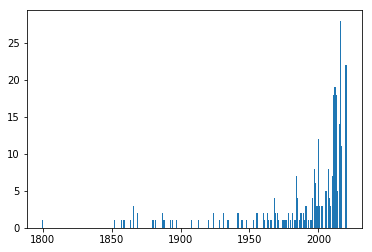

array([ 1845.,  1852.,  1864.,  1859.,  1869.,  1913.,  1924.,  1941.,
        1955.,  1956.,  1961.,  1965.,  1968.,  1977.,  1971.,  1981.,
        1984.,  1985.,  1987.,  1996.,  1997.,  1998.,  1999.,  2001.,
        2000.,  2003.,  2005.,  2008.,  2009.,  2010.,  2011.,  2012.,
        2013.,  2015.,  2016.,  2017.,  2020.,  1978.,  1986.,  1989.,
        1988.,  2006.,  2014.,  1857.,  1866.,  1880.,  1882.,  1887.,
        1893.,  1920.,  1928.,  1931.,  1934.,  1944.,  1945.,  1942.,
        1960.,  1963.,  1969.,  1970.,  1974.,  1980.,  1991.,  1994.,
        2002.,  2007.,  1888.,  1908.,  1948.,  1975.,  1976.,  1983.,
        1800.,  1935.,  1993.,  1966.,  1995.,  1953.,  1964.,  1894.,
        1897.,  1990.])

In [350]:
plt.bar(years[1:],years_ndarray[1:])
plt.show()
years

In [319]:

# 2. посчитать частотность каждой семантческой группы (без предиката - не семантическая) внутри всей выборки - pie chart. Отрисовать её частотность по годам.
#   1. Для каждого примера:
#     Если тип есть в списке типов:
#       значение типа += 1
#     Если типа нет в списке типов:
#       добавить тип в список, приравняв его значение 1
#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       процент этой семантической группы = значение семантической группы/общее число примеров*100%
#   3. Рисуем pie chart с соответствующими процентами, легендой

# 3. посчитать частотность l, r, l0, ambi, 0 всего и внутри каждой семантической группы. можно отрисовать по годам - всего
#   1. Собираем позицию предиката по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
#         Если такая позиция есть в списке позиций этого листа:
#           значение позиции += 1
#         Если такой позиции нет в списке позиций этого листа:
#           добавить позицию в список, приравняв её значение 1
#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       процент этой семантической группы = значение семантической группы/общее число примеров*100%
#   3. Рисуем pie chart с соответствующими процентами, легендой
#    4. Собираем даты позиций по типам:
#     Для каждого семантического типа:
#       Для каждой даты:
#         Для каждой позиции этого семантического типа:
#           Для каждого примера с этой датой:
#             Если пример с этой позициией:
#               Значение этой позиции для этой даты += 1
#   5. Нарисовать график:
#     По одной оси -   года, по другой - число примеров
#     График отдельного цвета/рисунка для каждой позиции группы (кроме стоить - она очень маленькая)
#     Отдельный график для каждой семантической группы

# Оч неэффективно

# Оч некрасиво

# Я засыпун

# # !, [27 Apr 2017, 1:16]:
# ну и засыпай

# меня тоже рубит
# Галка, [27 Apr 2017, 1:16]:
# 4. посчитать частотность предикатов внутри групп, вывести топ 3 или топ 5
#   1. Собираем даты по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
#         Если такой предикат есть в списке предикатов этого листа:
#           значение предиката += 1
#           значение предиката в общем списке дат += 1
#         Если такого предиката нет в списке предикатов этого листа:
#           добавить предикат в список, приравняв его значение 1
#           Если такого предиката нет в общем списке предикатов:
#             добавить предикат в список, приравняв его значение 1
#   2. Ищем максимумы каждого типа:
#     Для каждого семантического типа:
#       Сортировать (значения предикатов на этом листе) в порядке убывания, взять первые 3 различных числа
#       Вывести словарь "максимальных" предикатов с таким значением из этих предикатов

# # !, [27 Apr 2017, 1:16 (27/04/2017, 1:16:33)]:
# я превращу это в питон и подскажу, где, как мне кажется, можно проще и лучше

# Галка, [27 Apr 2017, 1:16]:
# Ага

# Но осталось1 пункт

# # !, [27 Apr 2017, 1:16]:
# и спать!

# Галка, [27 Apr 2017, 1:16]:
# Ща я его

# И ещё можно модно делать это всё одновременно -

# Типа все пункты

# Ясен хрен

# Не

# Что-то пункт брльшооой

# Слоожный

# Я спаааать

# # !, [27 Apr 2017, 1:26]:
# Вот и молодец

# Галка, [27 Apr 2017, 12:11]:
# (

# Галка, [27 Apr 2017, 13:54]:
# Пинг

# Галка, [27 Apr 2017, 16:20]:
# 5. посчитать частотность различных грамматических форм внутри каждой группы и всего по выборке - число, лицо, время и форма предиката
#   1. Собираем формы по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
#         Если tense == fut:
#           значение fut этого листа += 1
#           значение fut в общем += 1
#         Если tense == present:
#           значение present этого листа += 1
#           значение present в общем += 1
#         Если tense == past:
#           значение past этого листа += 1
#           значение past в общем += 1
#         Если number == 1:
#           значение sing этого листа += 1
#           значение sing в общем += 1
#         Если number == 2:
#           значение plur этого листа += 1
#           значение plur в общем += 1
#         Если person == 1:
#           значение 1p этого листа += 1
#           значение 1p в общем += 1
#         Если person == 2:
#           значение 2p этого листа += 1
#           значение 2p в общем += 1
#         Если person == 3:
#           значение 3p этого листа += 1
#           значение 3p в общем += 1
#         Если такая форма есть в списке форм этого листа:
#           значение формы += 1
#           значение формы в общем списке дат += 1
#         Если такой даты нет в списке дат этого листа:
#           добавить форму в список, приравняв её значение 1
#           Если такой формы нет в общем списке форм:
#             добавить форму в список, приравняв её значение 1
#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       Для каждой грамматической характеристики (лицо, число, время и форма)
#       процент этого значения этой характеристики = значение этой характеристики/общее число примеров в этой сем. группе*100%
#   3. Рисуем pie chart для каждой характеристики с соответствующими процентами, легендой